In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


# Converting affairs column into int with conditions

In [5]:
dta['affair']=(dta['affairs']>0).astype(int)

In [7]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


# Now it is a classification problem

In [9]:
dta.shape

(6366, 10)

In [10]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [11]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

# No null values present in the dataset so we can proceed

In [14]:
has_affair=np.sum(dta['affair']==1)

In [15]:
has_affair

2053

In [16]:
hasno_affair=np.sum(dta['affair']==0)

In [17]:
hasno_affair

4313

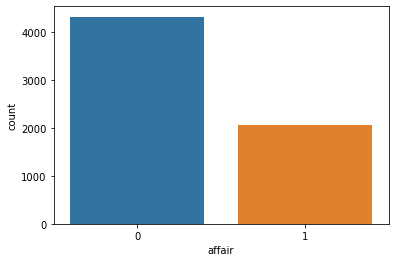

In [26]:
sns.countplot(x='affair',data=dta)

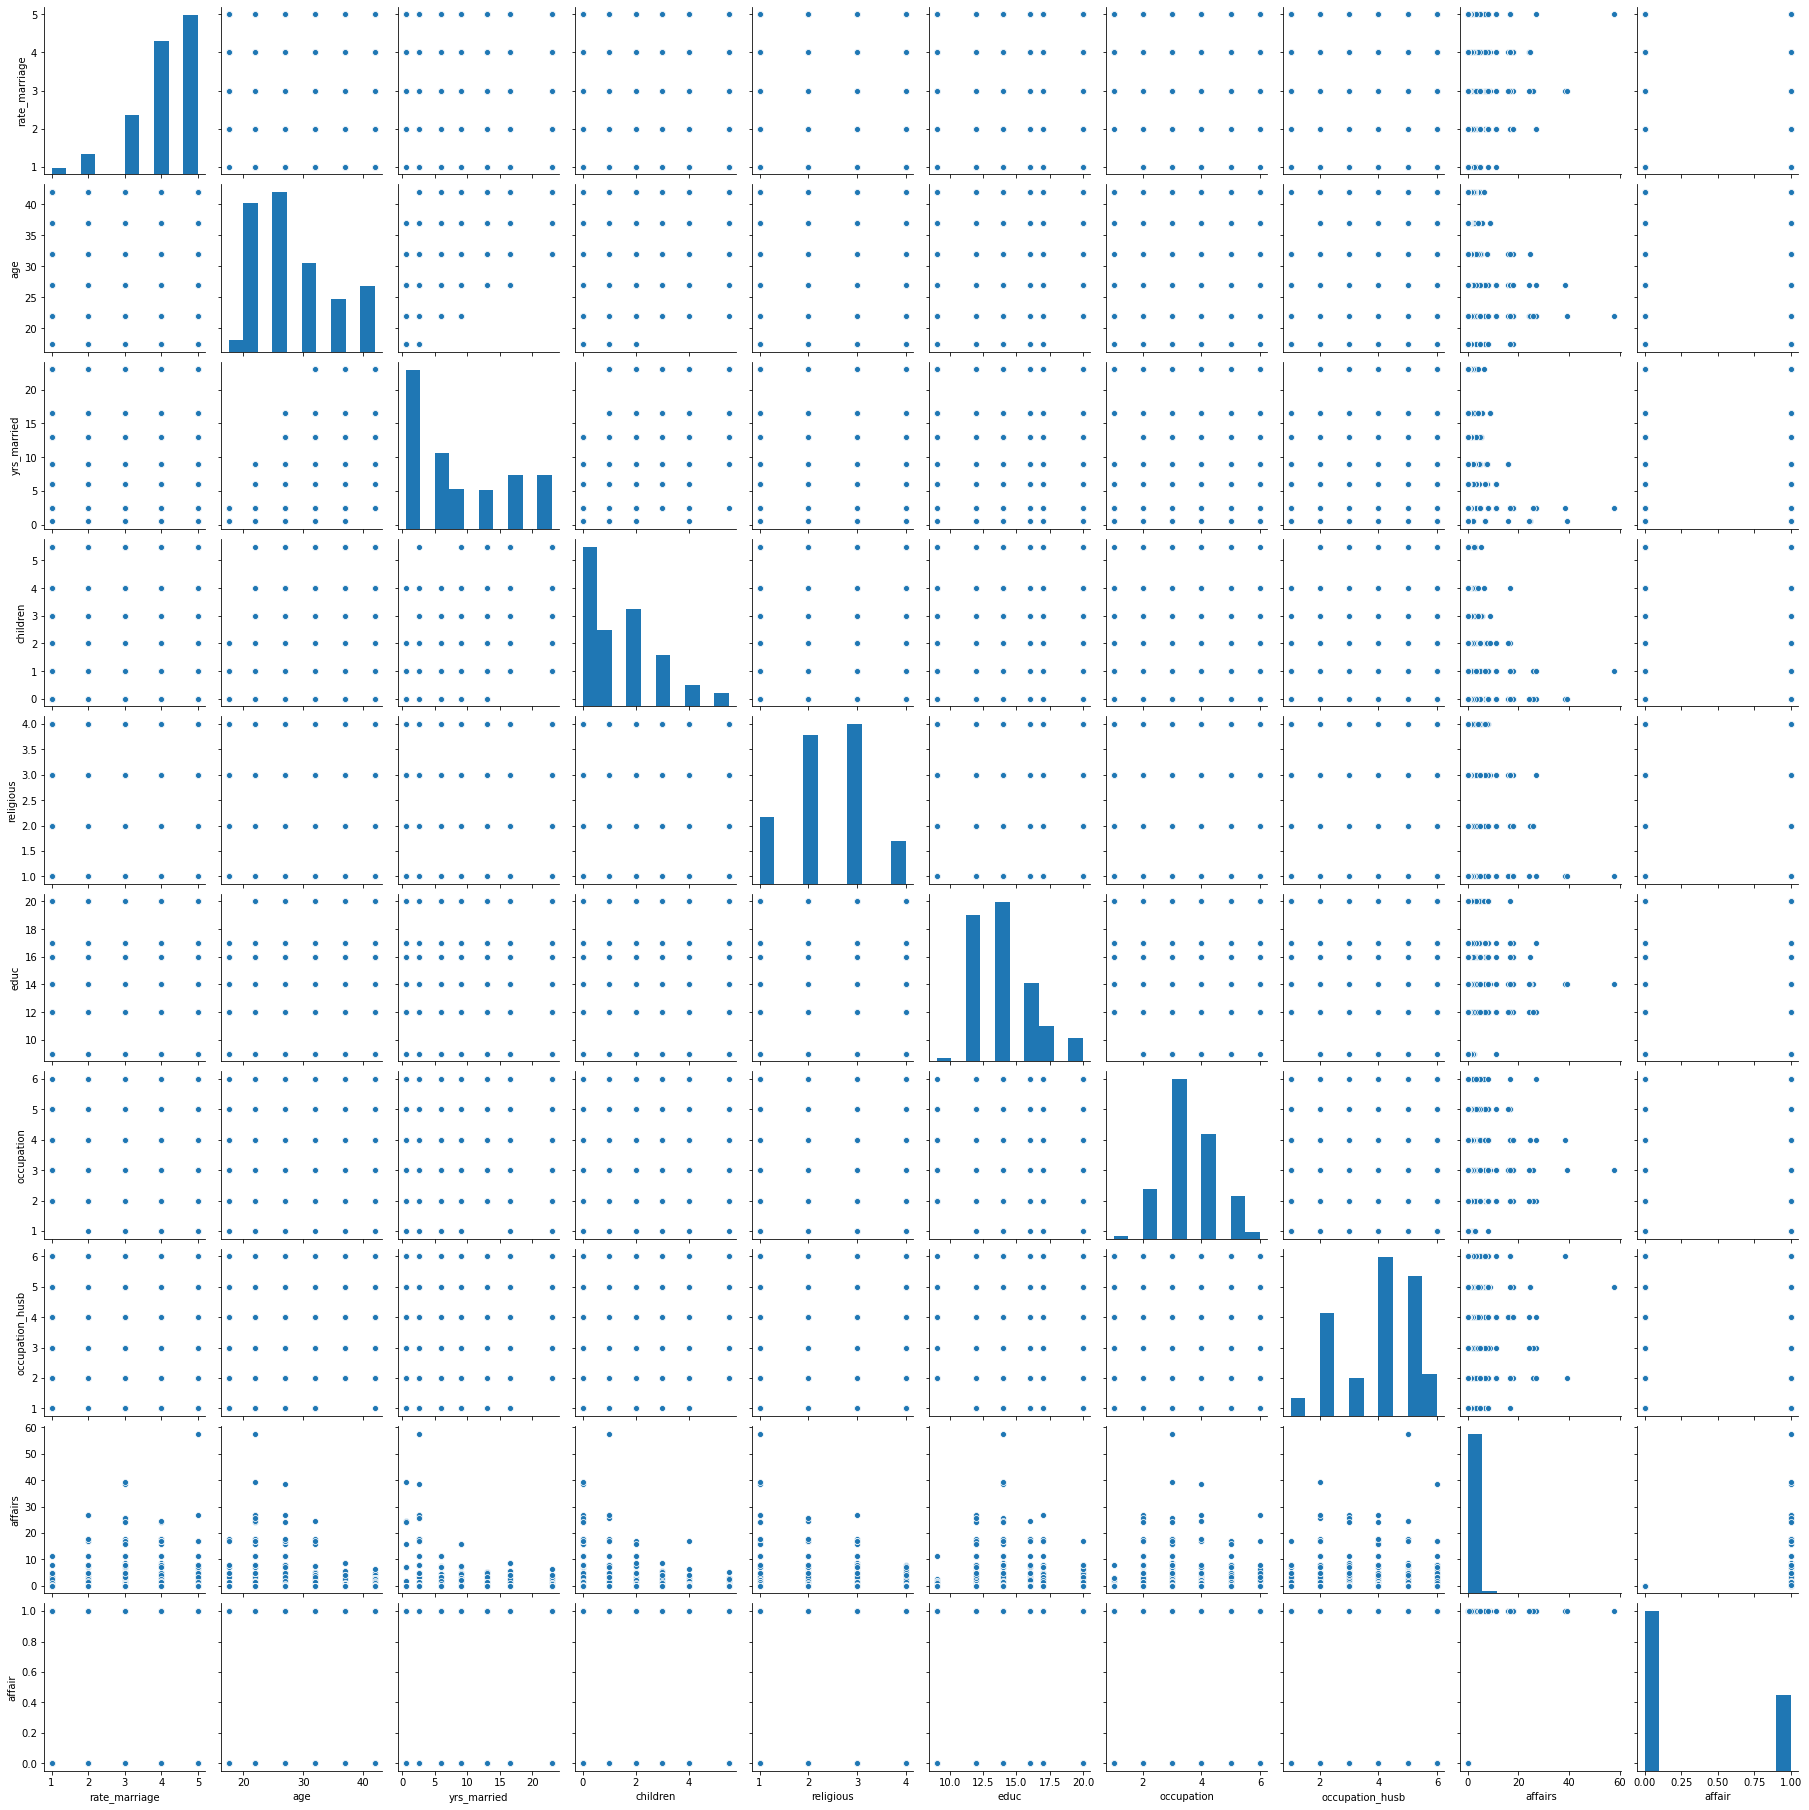

In [27]:
sns.pairplot(dta)

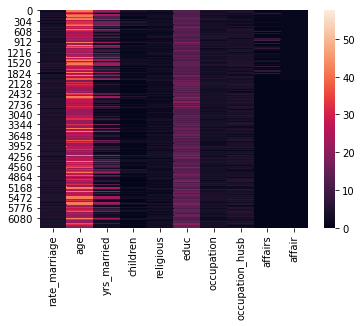

In [31]:
sns.heatmap(data=dta)

In [36]:
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


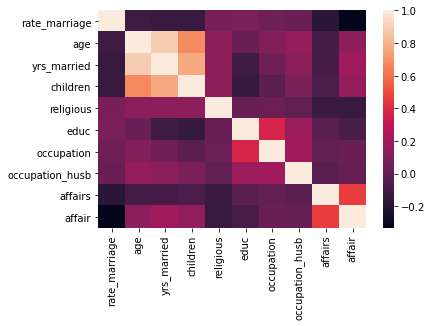

In [35]:
sns.heatmap(dta.corr())

In [39]:
X = dta.drop(columns = ['affairs','affair'])
y = dta['affair']

In [40]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32

# Implementing Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
lr.score(x_train,y_train)

0.7272727272727273

In [50]:
lr.score(x_test,y_test)

0.7160804020100503

# Evaluating accuracy of our model

In [51]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [52]:
y_pred = lr.predict(x_test)

In [53]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [54]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7160804020100503

In [56]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[964, 120],
       [332, 176]], dtype=int64)

In [57]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [58]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7160804020100503

In [59]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8892988929889298

In [60]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7438271604938271

In [61]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8100840336134454

In [62]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6178777929511579

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores

array([0.71585557, 0.70015699, 0.74568289, 0.71271586, 0.70172684,
       0.73155416, 0.71855346, 0.69968553, 0.74685535, 0.75943396])

In [64]:
scores.mean()

0.72322206095791